In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Web_Traffic.csv")
print(data.head())

       Date  Views
0  1/6/2021   7831
1  2/6/2021   7798
2  3/6/2021   7401
3  4/6/2021   7054
4  5/6/2021   7973


In [3]:
data["Date"] = pd.to_datetime(data["Date"],format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


### The Date time column was an object initially, so I converted it into a Datetime column. Now let’s have a look at the daily traffic of the website:



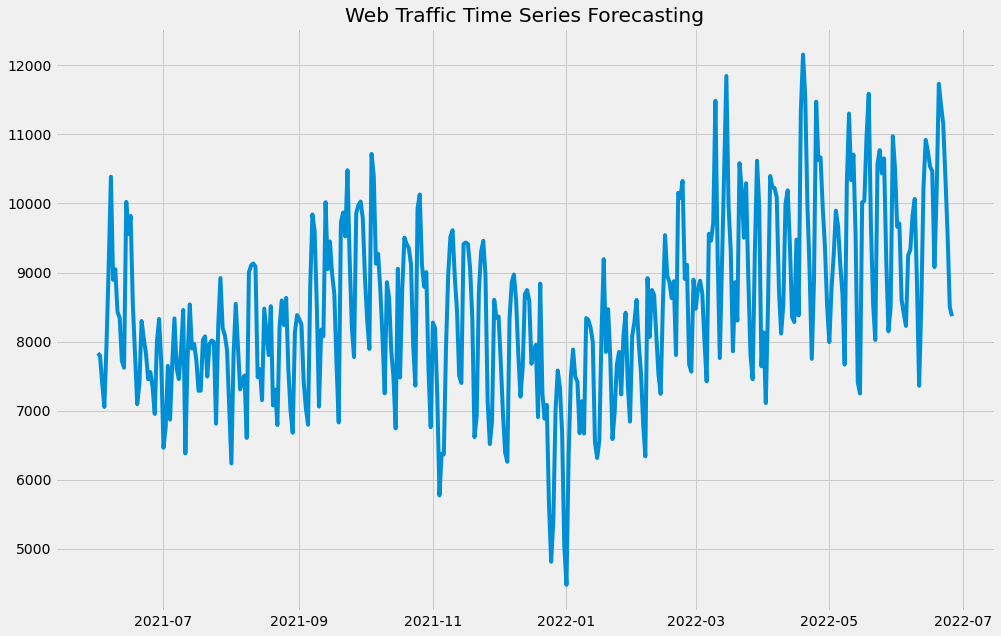

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Web Traffic Time Series Forecasting")
plt.show()

<Figure size 432x288 with 0 Axes>

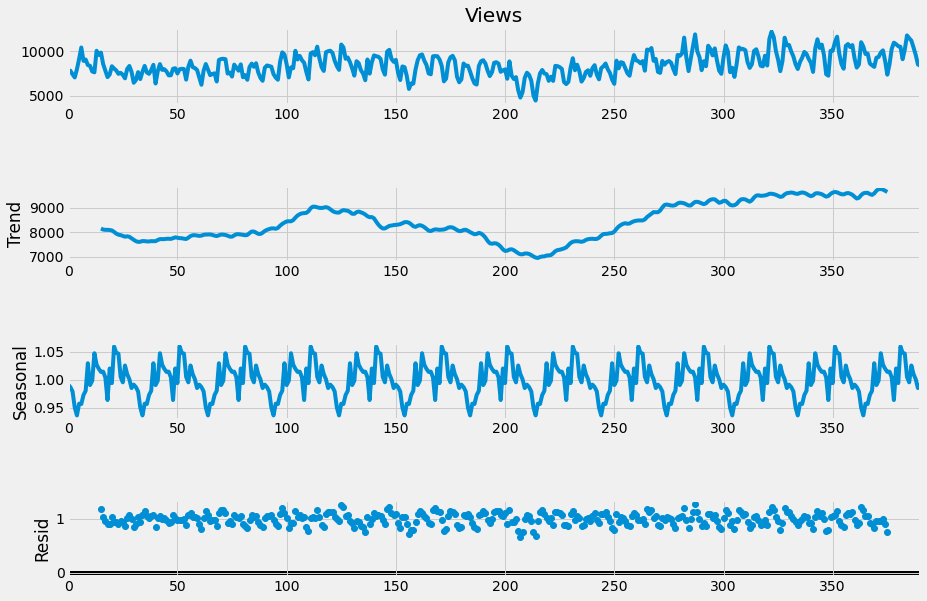

In [8]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

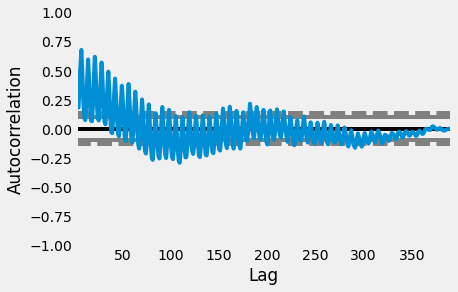

In [9]:
pd.plotting.autocorrelation_plot(data["Views"])

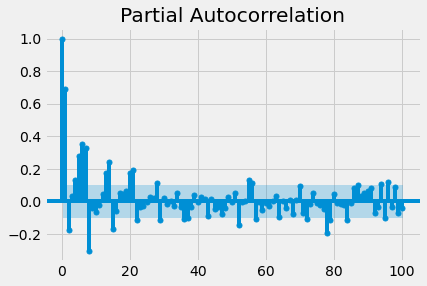

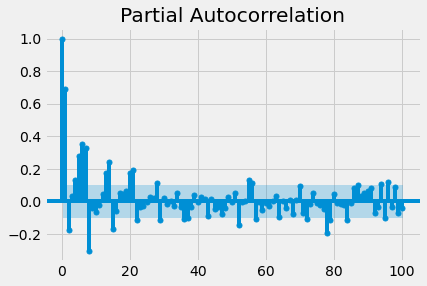

In [10]:
plot_pacf(data["Views"], lags = 100)

In [18]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.003
Date:                            Tue, 03 Oct 2023   AIC                           6228.006
Time:                                    13:37:26   BIC                           6287.029
Sample:                                         0   HQIC                          6251.432
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7761      0.132      5.877      0.000       0.517       1.035
ar.L2         -0.8031      0.136   

### Forecast traffic on the website for the next 50 days

In [14]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9896.301988
392    10808.510705
393    10717.053382
394     9818.122939
395     8760.691595
396     8235.014428
397     8952.987863
398     9731.650529
399    10321.742479
400    10583.336473
401     9847.477922
402     9308.503419
403     8999.118213
404     9092.488896
405    10513.708597
406    11004.207024
407    10889.940183
408    10028.412175
409     9377.089975
410     8606.719694
411     9208.627665
412    10378.296387
413    10654.671903
414    10800.653817
415    10216.814199
416     9372.858698
417     8962.221900
418     9178.800830
419     9959.784270
420    10287.447805
421    10725.450790
422     9860.894406
423     9468.988602
424     8978.482838
425     8891.312024
426    10225.172720
427    10907.953713
428    10902.238572
429    10319.238467
430     9368.656215
431     8681.085601
432     8767.849831
433    10143.399526
434    10586.333146
435    10860.505788
436    10381.388783
437     9273.808802
438     9158.509600
439     9412.225011
440    10375.528130


<AxesSubplot:>

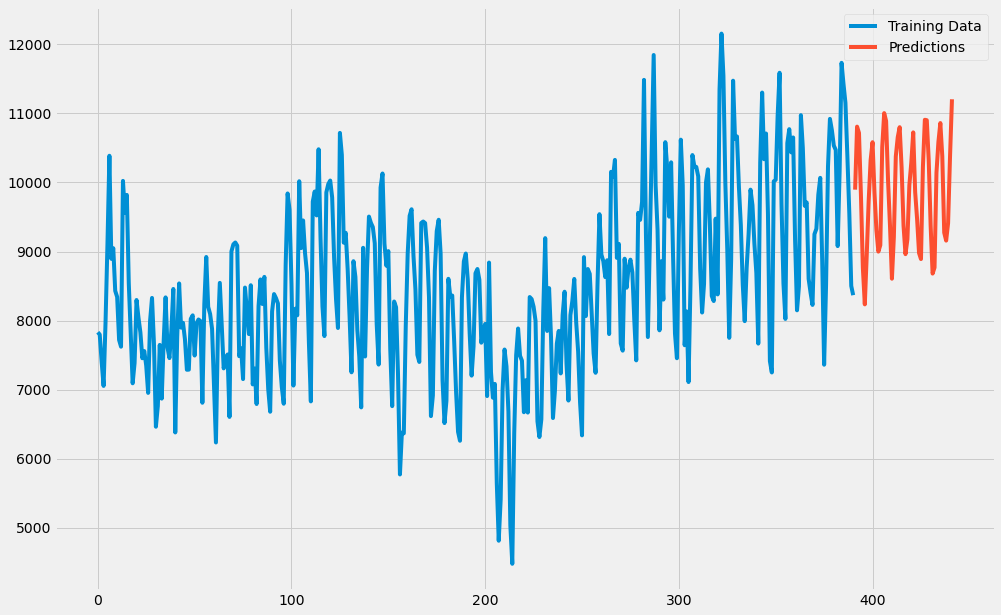

In [15]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")